In [53]:
from dataclasses import dataclass
from pathlib import Path
from typing import List

import numpy as np
import numpy.typing as npt

import gzip
import pickle

In [54]:
@dataclass
class HDMapGen:

    nodes: npt.NDArray[np.float32]  # shape (num_nodes, 2)
    connections: npt.NDArray[np.int16]  # shape (num_connections, 2)
    subnodes: npt.NDArray[np.float32]  # shape (num_connections, 20, 2)


def load_gz_dirs(gz_dirs: List[Path]) -> List[HDMapGen]:
    features: List[HDMapGen] = []
    for gz_dir in gz_dirs:
        with gzip.open(gz_dir, "rb") as f:
            data = pickle.load(f)

        features.append(
            HDMapGen(
                nodes=data["nodes"],
                connections=data["connections"],
                subnodes=data["subnodes"],
            )
        )

    return features

def find_gz_dirs(root_path: Path, file_name: str = "hdmapgen.gz") -> List[Path]:
    """Find files in a directory structure that end with a specified extension"""

    gz_dirs = []
    for log_path in root_path.iterdir():

        if "metadata" in str(log_path):
            continue

        for scenario_path in log_path.iterdir():
            for token_path in scenario_path.iterdir():
                gz_dirs.append(token_path / file_name)

    return gz_dirs

In [55]:
root_path = Path("/home/daniel/nuplan/cache/hdmapgen")
features = load_gz_dirs(find_gz_dirs(root_path))

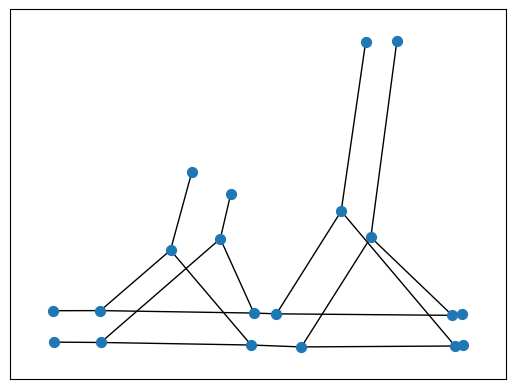

In [56]:
import networkx as nx

index = 10
hdmapgen = features[index]


G = nx.DiGraph()
for node_idx, node in enumerate(hdmapgen.nodes):
    G.add_node(node_idx, point=node)
    
for connection_idx, (node_idx_a, node_idx_b) in enumerate(hdmapgen.connections):
    G.add_edge(node_idx_a, node_idx_b)
    polyline = hdmapgen.subnodes[connection_idx]
    
positions = hdmapgen.nodes

node_size = 50
nx.draw_networkx_nodes(G, positions, node_size = node_size)
nx.draw_networkx_edges(G, positions, edge_color="black", arrows=False)